In [ ]:
"""
Purpose: To play around with the data that was created 
for the limbs


"""

In [1]:
from os import sys
sys.path.append("/meshAfterParty/")
%matplotlib inline

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import dimensionality_reduction_utils as dr
import clustering_utils as cl
dr = reload(dr)
cl = reload(cl)
import pandas_utils as pu

from sklearn.preprocessing import StandardScaler
import time

In [3]:
df = pd.read_pickle("neuron_dendrite_path_data")
df_filtered = pu.filter_away_nan_rows(df)

# Get the distribution of the limb starts 

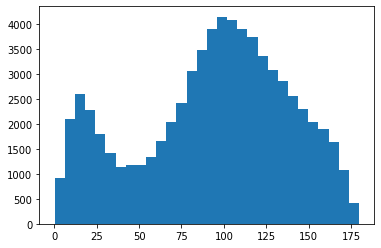

In [5]:
soma_angles =df_filtered[::4]["soma_angle"].to_numpy()
bin_data = plt.hist(soma_angles,bins=30)

# Function That Will do All of PCA Analysis based on the columns picked

# Extracting the Vectors we want to process

In [6]:
columns_picked = df_filtered.columns[5:].to_numpy()
columns_picked

array(['soma_angle', 'n0_width_median_mesh_center',
       'n0_width_no_spine_median_mesh_center', 'n0_n_spines',
       'n0_total_spine_volume', 'n0_spine_volume_median',
       'n0_spine_volume_density', 'n0_skeletal_length', 'n0_parent_angle',
       'n0_sibling_angle', 'n1_width_median_mesh_center',
       'n1_width_no_spine_median_mesh_center', 'n1_n_spines',
       'n1_total_spine_volume', 'n1_spine_volume_median',
       'n1_spine_volume_density', 'n1_skeletal_length', 'n1_parent_angle',
       'n1_sibling_angle'], dtype=object)

In [8]:
np.set_printoptions(suppress=True)
data_v_unscaled = df_filtered[columns_picked].to_numpy()
data_v = StandardScaler().fit_transform(data_v_unscaled)

# Run PCA

n_components = 19
whiten = False
---- Using sklearn method ----


<Figure size 432x288 with 0 Axes>

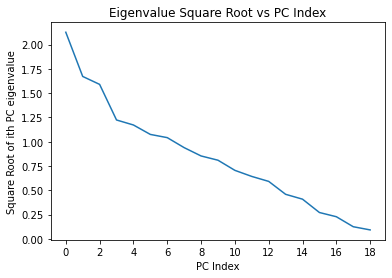

In [9]:
dr = reload(dr)
data_analyzed = dr.pca_analysis(data_v,n_components=data_v.shape[-1],whiten=False,plot_sqrt_eigvals=True)

<Figure size 432x288 with 0 Axes>

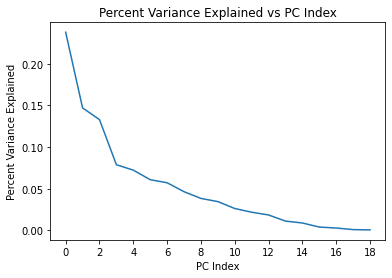

In [10]:
dr = reload(dr)
dr.plot_variance_explained(data_analyzed)

In [11]:
data_analyzed["percent_variance_explained_up_to_n_comp"]

array([0.23796932, 0.3850107 , 0.51800989, 0.59677337, 0.66904185,
       0.72982639, 0.78692859, 0.83329961, 0.87159956, 0.90606431,
       0.93221489, 0.95392509, 0.97232043, 0.98337549, 0.99214822,
       0.9960111 , 0.99873814, 0.99955635, 1.        ])

# Picking Just the First 2 Components

In [12]:
n_components = 4
data_compressed = dr.pca_analysis(data_v,n_components=n_components,whiten=True,plot_sqrt_eigvals=False)
data_compressed["data_proj"].shape

n_components = 4
whiten = True
---- Using sklearn method ----


(278292, 4)

# Look at what the first 2 components comprise of 

In [13]:
data_compressed["eigenVectors"]

array([[-0.19556054,  0.31771001,  0.32788429, -0.15107793, -0.10442843,
         0.08484864, -0.00729187, -0.20608667, -0.07213985, -0.02071912,
         0.39414437,  0.36587468,  0.24867125,  0.26474422,  0.26314727,
         0.29101382,  0.17938905, -0.19592859, -0.13629352],
       [ 0.05404828, -0.18244961, -0.21884894,  0.28905099,  0.32778828,
         0.18355085,  0.25793431,  0.2434293 , -0.05779243, -0.17621734,
        -0.1094257 , -0.1913057 ,  0.38957609,  0.3845327 ,  0.02778719,
         0.20473063,  0.33751453, -0.07183327, -0.14511875],
       [-0.19362339,  0.27919921,  0.23235566,  0.38134557,  0.433762  ,
         0.15722044,  0.3203666 ,  0.30423653, -0.07926102, -0.0909925 ,
         0.15087702,  0.1802197 , -0.23995179, -0.22697538,  0.04537484,
        -0.00229395, -0.2911001 ,  0.03406296,  0.10108653],
       [-0.25425391,  0.18231184,  0.1808073 ,  0.03402487,  0.07864127,
        -0.01641877,  0.0638322 ,  0.02496469,  0.43663492,  0.46330611,
        -0.044

In [14]:
PC1 = data_compressed["eigenVectors"][0]
PC1_columns = np.where(np.abs(PC1)>0.2)[0]
columns_picked[PC1_columns]

array(['n0_width_median_mesh_center',
       'n0_width_no_spine_median_mesh_center', 'n0_skeletal_length',
       'n1_width_median_mesh_center',
       'n1_width_no_spine_median_mesh_center', 'n1_n_spines',
       'n1_total_spine_volume', 'n1_spine_volume_median',
       'n1_spine_volume_density'], dtype=object)

In [15]:
PC2 = data_compressed["eigenVectors"][1]
PC2_columns = np.where(np.abs(PC1)>0.2)[0]
columns_picked[PC2_columns]

array(['n0_width_median_mesh_center',
       'n0_width_no_spine_median_mesh_center', 'n0_skeletal_length',
       'n1_width_median_mesh_center',
       'n1_width_no_spine_median_mesh_center', 'n1_n_spines',
       'n1_total_spine_volume', 'n1_spine_volume_median',
       'n1_spine_volume_density'], dtype=object)

# Plotting the Projected Data

Text(0.5, 1.0, 'PC Projection on First 2 Principal Components')

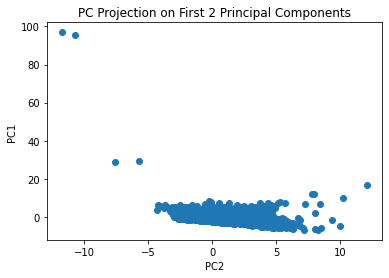

In [16]:
n_dim = 2
proj_data = data_compressed["data_proj"][:,:n_dim]

fig,ax = plt.subplots(1,1)
ax.scatter(proj_data[:,0],proj_data[:,1])
ax.set_ylabel("PC1")
ax.set_xlabel("PC2")
ax.set_title("PC Projection on First 2 Principal Components")

In [17]:
data_compressed["data_proj"].shape

(278292, 4)

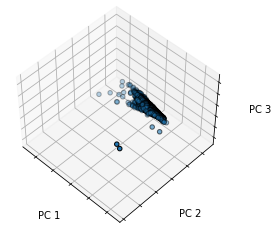

In [18]:
dr.plot_projected_data(data_proj = data_compressed["data_proj"],
                    labels = None)

# Running the Clustering Algorithm on the Processed

In [25]:
from sklearn import mixture

In [22]:
X_train = data_compressed["data_proj"]
X_train.shape

(278292, 4)

In [29]:
K = 4
covariance_type = "full"

st_time = time.time()
X_train = data_compressed["data_proj"]

#1) Training the GMM
gmm = mixture.GaussianMixture(n_components=K, covariance_type=covariance_type)
gmm.fit(X_train)

# Getting the Average Log likelihood:
average_log_likelihood_train = gmm.score(X_train)
print(f"Convergence status = {gmm.converged_}")
print(f"Total time for GMM = {time.time() - st_time}")



Convergence status = True
Total time for GMM = 3.609741687774658


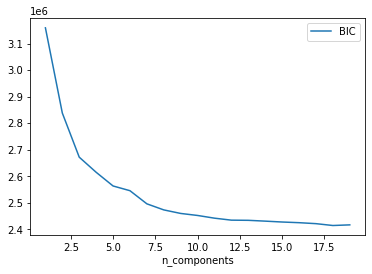

In [35]:
n_components = np.arange(1, 20)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X_train)
          for n in n_components]
bic_values = [m.bic(X_train) for m in models]

plt.plot(n_components, bic_values, label='BIC')
#plt.plot(n_components, [m.aic(X_train) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Predicting the Probability using the Gaussian Models

In [ ]:
"""
probs = gmm.predict_proba(X)
print(probs[:5].round(3))
"""

# K-Means Clustering


In [36]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X_train)

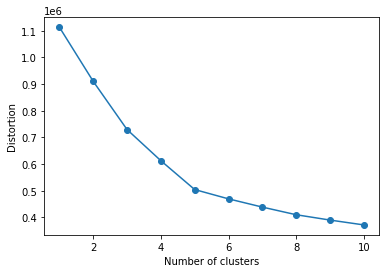

In [38]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 21):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_train)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_
